# PRiAD 4 - test zaliczający

Test obejmuje materiał z ćwiczenia PRiAD4, wymaga także znajmości zagadnień z wcześniejszych ćwiczeń.

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

pd.options.display.float_format = "{:.2f}".format 

> **Zadanie 1** Wykonaj grupowanie danych zbioru `iris` metodą aglomeracyjną. Oszacuj na podstawie analizy otrzymanych danych (m.in. dendrogramu) jakia jest optymalna liczba grup i najlepszy typ odległości.

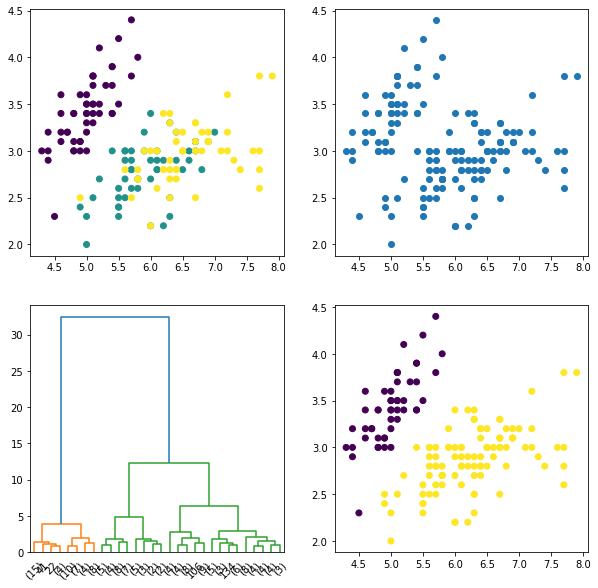

In [23]:
# kod 
iris = pd.read_csv('iris.csv', index_col = 0)
df = iris.drop(columns = ['species'])
grupy = linkage(df, method = 'ward', metric = 'euclidean')
prog_proc = 70
prog = prog_proc*max(grupy[:,2])/100

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(x = df['sepal_length'], y = df['sepal_width'], c = iris['species'].astype('category').cat.codes)
plt.subplot(2,2,2)
plt.scatter(x = df_org['sepal_length'], y = df_org['sepal_width'])
plt.subplot(2,2,3)
cl = dendrogram(grupy, truncate_mode = 'lastp', color_threshold = prog )
df['grupa'] =  fcluster(grupy, prog, criterion = 'distance')
plt.subplot(2,2,4)
plt.scatter(x = df['sepal_length'], y = df['sepal_width'], c = df['grupa'])

Wnioski z analizy wyników zad. 1:
* Po analizie dendrogramu, możemy zauważyć, że optymalna liczba grup to 2
* 2 grupy (w kolorze zielonym) charakteryzują się dużym podobieństwem
* Grupa w kolorze pomarańczowym odbiega danymi od pozostałych grup
* Najlepszym typem odległości będzie tutaj odległość Warda, gdyż różnicuje ona grupy w największym stopniu


> **Zadanie 2** Wykonaj grupowanie danych zbioru `iris` metodą k-średnich. Określ optymalne paramtery grupowania  (liczbę grup, typ odległości). Określ obiema metodami (łokciową i sylwetki) jakia jest dla optymalna liczba grup.

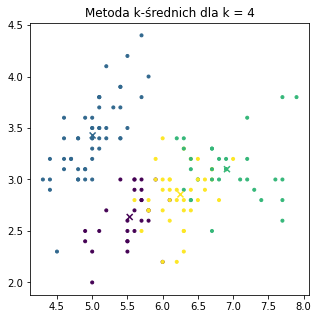

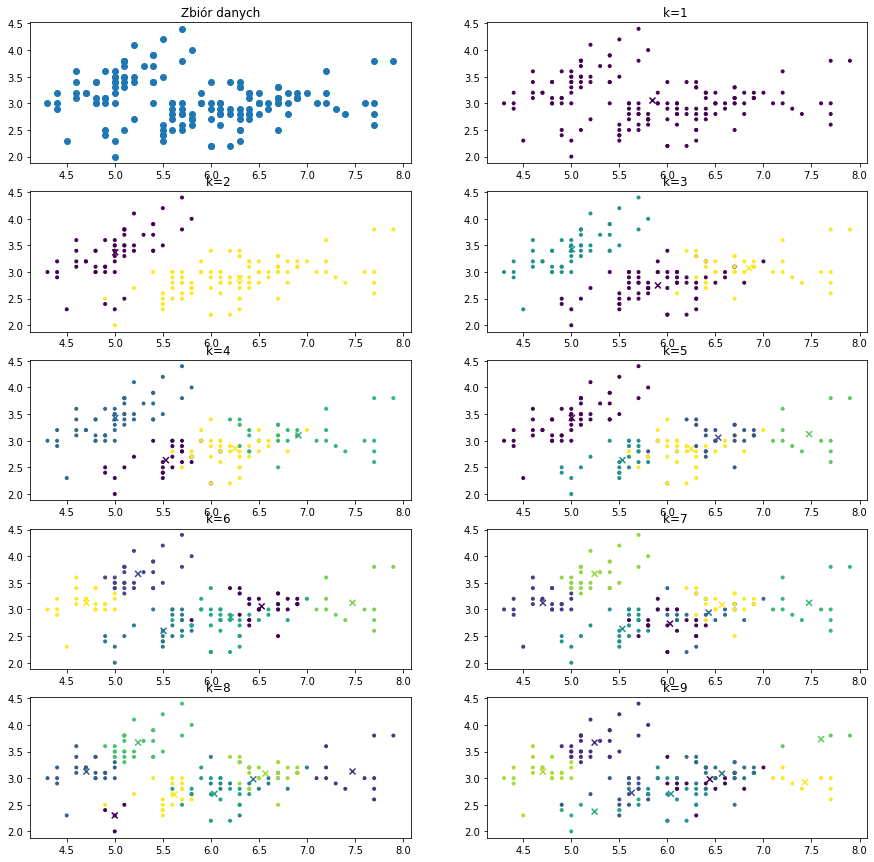

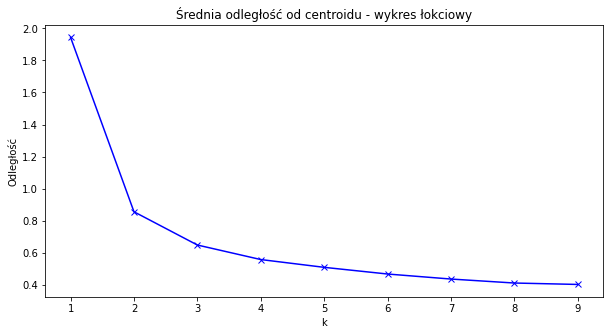

C:\Users\jakub\AppData\Local\Temp/ipykernel_19388/3357758114.py:46: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  miara_jakosci = pd.Series()


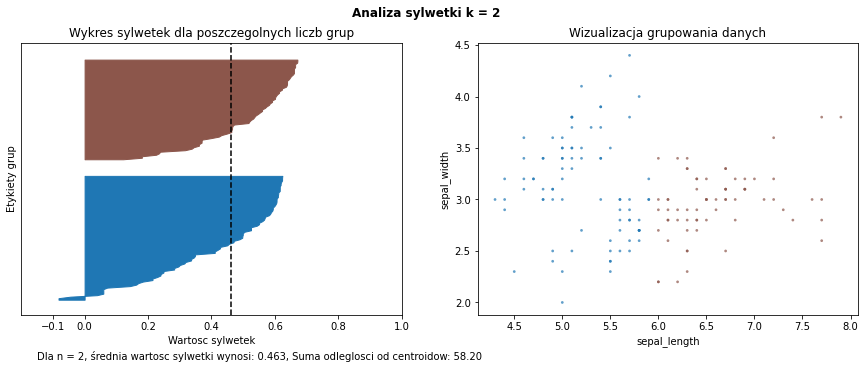

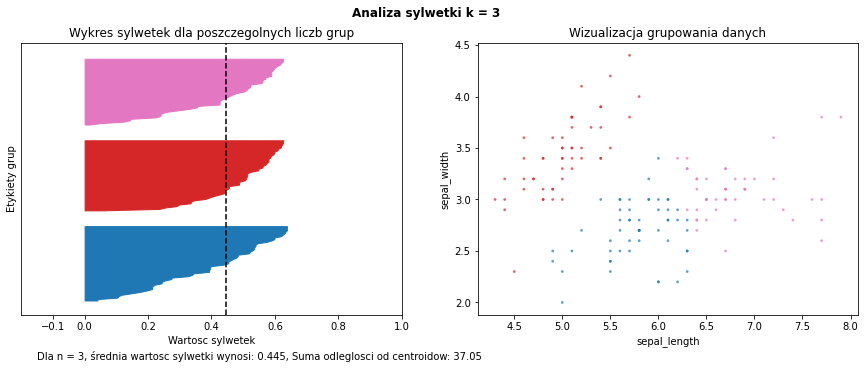

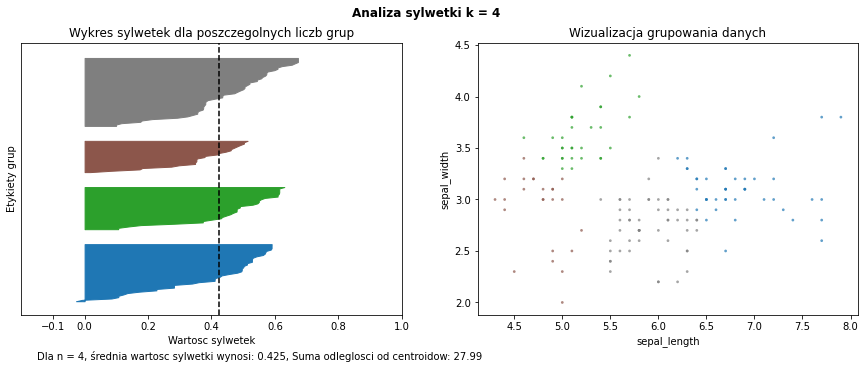

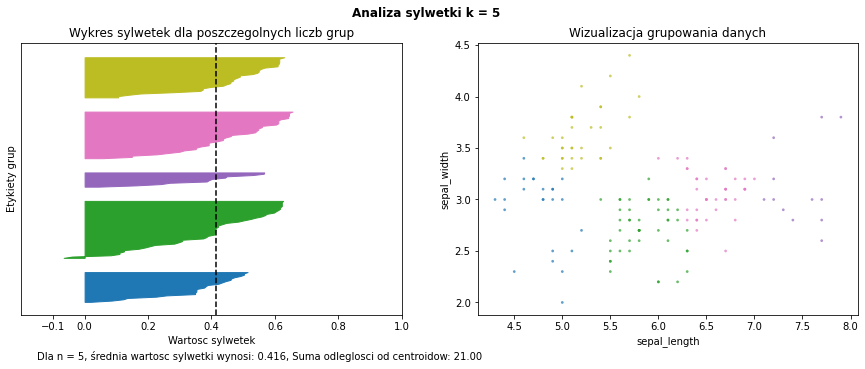

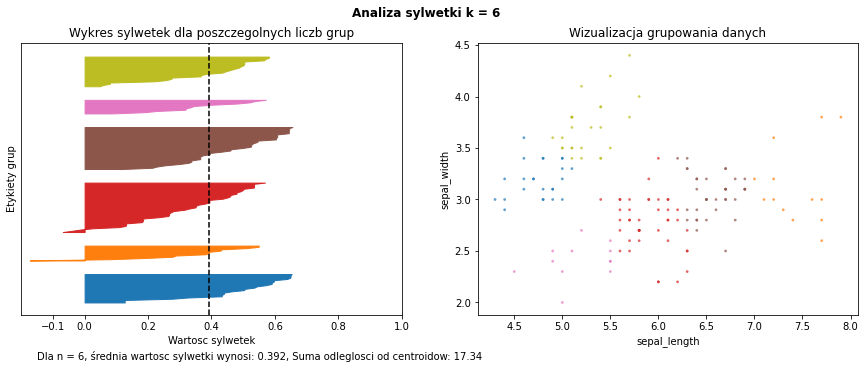

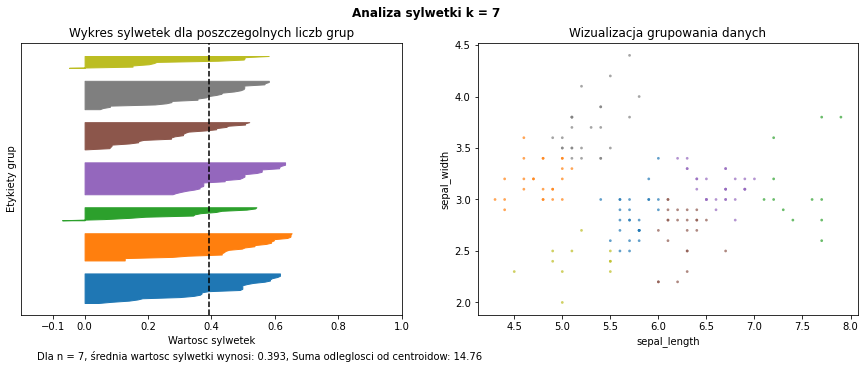

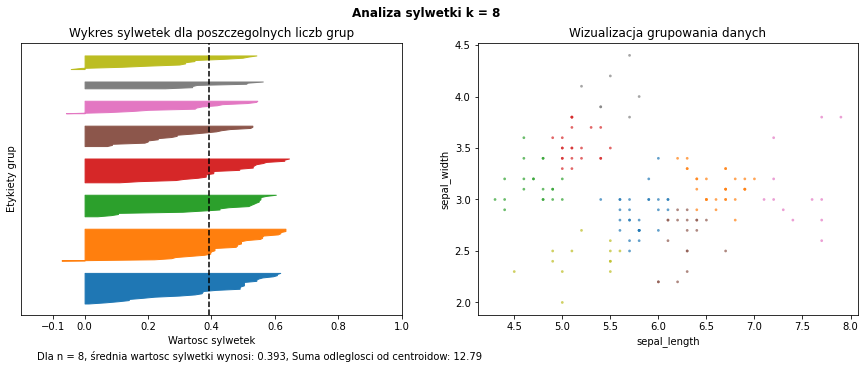

Text(0, 0.5, 'Suma odleglosci od centroidow')

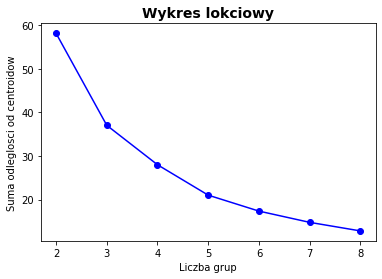

In [24]:
# kod
k = 4
df_org = pd.read_csv('iris.csv', index_col = 0)
df = df_org.drop(columns = ['species'])
kmeans = KMeans(n_clusters = k, random_state = 0)
kmeans.fit(df)
etykiety_klastrow = kmeans.fit_predict(df)
fig = plt.figure(figsize = (5,5))
plt.scatter(df.sepal_length, df.sepal_width, marker = '.', c = etykiety_klastrow)
centroidy = kmeans.cluster_centers_
plt.scatter(centroidy[:,0], centroidy[:,1], marker = 'x', c = np.array(range(k)))
plt.title('Metoda k-średnich dla k = %d' %k)

#Metoda łokciowa
maks_k = 9
zakres_k = range(1,maks_k)
ile_w_pionie = int(maks_k/2) + 1
plt.figure(figsize=(15,15))
plt.subplot(ile_w_pionie,2,1)
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.title('Zbiór danych')
srednia_odl = []
pozycja = 2
for k in range(1,maks_k+1):
    plt.subplot(ile_w_pionie,2,pozycja)
    pozycja = pozycja + 1
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    etykiety_klastrow = kmeans.fit_predict(df)
    plt.scatter(df.sepal_length, df.sepal_width, marker='.', c=etykiety_klastrow)
    centroidy = kmeans.cluster_centers_
    plt.scatter(centroidy[:,0], centroidy[:,1], marker='x', c=np.array(range(k)))
    plt.title('k=%s ' % k)
    srednia_odl.append(sum(np.min(cdist(df, centroidy, 'euclidean'), axis=1)) / df.shape[0]) 

plt.figure(figsize=(10,5))
plt.plot(range(1,maks_k+1), srednia_odl, 'bx-')
plt.xlabel('k')
plt.ylabel('Odległość')
plt.title('Średnia odległość od centroidu - wykres łokciowy')
plt.show()


#Metoda sylwetki
liczby_grup = [2, 3, 4, 5, 6, 7, 8]
miara_jakosci = pd.Series()
attributes = ['sepal_length','sepal_width']

for ile_grup in liczby_grup :
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)

    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (ile_grup + 1) * 10])
    kmeans = KMeans(n_clusters = ile_grup, random_state = 0).fit(df[attributes])
    miara_jakosci = miara_jakosci.append(pd.Series(kmeans.inertia_))
    etykiety_grup = kmeans.fit_predict(df[attributes])
    sylwetka = silhouette_samples(df[attributes], etykiety_grup)
    srednia_sylwetka = silhouette_score(df[attributes], etykiety_grup)

    pozycja_kreski = 10
    
    for i in range(ile_grup):
        sylwetka_w_grupie = sylwetka[etykiety_grup == i]
        sylwetka_w_grupie.sort()
        liczebnosc_grupy = sylwetka_w_grupie.shape[0]
        kolor = cm.tab10(float(i) / ile_grup)
        ax1.fill_betweenx(np.arange(pozycja_kreski, pozycja_kreski + liczebnosc_grupy), 0, sylwetka_w_grupie ,color = kolor)
        pozycja_kreski += liczebnosc_grupy + 10
        
    ax1.set_title("Wykres sylwetek dla poszczegolnych liczb grup")
    ax1.set_xlabel("Wartosc sylwetek")
    ax1.set_ylabel("Etykiety grup")
    
    ax1.axvline(x = srednia_sylwetka, color = "black", linestyle = "--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    kolory = cm.tab10(etykiety_grup.astype(float) / ile_grup)
    ax2.scatter(df[attributes[0]], df[attributes[1]], marker = '.', s = 30, lw = 0, alpha = 0.7,c = kolory)
    
    ax2.set_title("Wizualizacja grupowania danych")
    ax2.set_xlabel(attributes[0])
    ax2.set_ylabel(attributes[1])
    
    plt.suptitle(("Analiza sylwetki k = %d" % ile_grup),  fontweight = 'bold')
    plt.figtext(0.14, 0, ("Dla n = %d, średnia wartosc sylwetki wynosi: %.3f, Suma odleglosci od centroidow: %.2f"
                     % (ile_grup, srednia_sylwetka, kmeans.inertia_ ) ))
    plt.show()
    
plt.plot(liczby_grup, miara_jakosci,'bo-')
plt.title("Wykres lokciowy", fontsize = 14, fontweight = 'bold')
plt.xlabel("Liczba grup")
plt.ylabel("Suma odleglosci od centroidow")


Wnioski z analizy wyników zad. 2:
* Najlepszym typem odległości jest odległość euklidesowa
* Na podstawie metody łokciowej, możemy zauważyć, że najlepsza ilość grup to 4-5. W tym miejscu widzimy wypłaszczenie się wykresu łokciowego
* Natomiast na podstawie metody sylwetek, widzimy, że najbardziej optymalny jest podział na 2 grupy, dla których wartość sylwetki jest najwyższa (0.463)


> **Zadanie 3** Zmień nazwę tego skryptu na następującą "PRiAD4_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.